

**Dataset Link (Bike Details Dataset):** https://drive.google.com/file/d/1iKy23bMtEQShF_weneRNnYrFmzvpPOI3/view?usp=drive_link



In [4]:
# ✅ Setup (run this first)
# If running in Google Colab, this will install and import dependencies and download the dataset.
# It attempts to download via gdown using the file ID from the shared Drive link.

!pip -q install gdown pandas numpy matplotlib

import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Inline plots
%matplotlib inline

# Try to download the dataset from Google Drive using the file id
file_id = "1iKy23bMtEQShF_weneRNnYrFmzvpPOI3"
output_path = "bike_details.csv"
try:
    gdown.download(id=file_id, output=output_path, quiet=False)
    print("Downloaded to:", output_path)
except Exception as e:
    print("Download failed:", e)
    print("➡️ If download fails, upload the dataset manually to the Colab workspace as 'bike_details.csv'.")


Downloading...
From: https://drive.google.com/uc?id=1iKy23bMtEQShF_weneRNnYrFmzvpPOI3
To: /content/bike_details.csv
100%|██████████| 66.5k/66.5k [00:00<00:00, 30.1MB/s]

Downloaded to: bike_details.csv


In [5]:
# 🔧 Helper: Safe CSV loader
import os

def load_bikes(path="bike_details.csv"):
    if not os.path.exists(path):
        raise FileNotFoundError(f"Could not find '{path}'. Upload it or fix the path.")
    df = pd.read_csv(path)
    print("Loaded:", path)
    return df

## Question 1
**Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.**

In [6]:
# Answer:
df = load_bikes()
display(df.head(10))
print("\nShape:", df.shape)
print("\nColumns:")
for i, c in enumerate(df.columns, 1):
    print(f"{i}. {c}")

Loaded: bike_details.csv


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0



Shape: (1061, 7)

Columns:
1. name
2. selling_price
3. year
4. seller_type
5. owner
6. km_driven
7. ex_showroom_price


## Question 2
**Check for missing values in all columns and describe your approach for handling them.**

In [7]:
# Answer:
na_counts = df.isna().sum().sort_values(ascending=False)
print("Missing values per column:\n")
print(na_counts)
print("\nPercentage missing:\n")
print((na_counts/len(df)*100).round(2))


Missing values per column:

ex_showroom_price    435
selling_price          0
name                   0
year                   0
seller_type            0
owner                  0
km_driven              0
dtype: int64

Percentage missing:

ex_showroom_price    41.0
selling_price         0.0
name                  0.0
year                  0.0
seller_type           0.0
owner                 0.0
km_driven             0.0
dtype: float64


### 🧩 Handling Missing Values

The `ex_showroom_price` column has about **41% missing values**, while other columns are complete.  
Since it represents the bike’s **original price** and strongly influences the **selling price**, dropping these rows would lead to major data loss and affect the overall analysis.

Hence, the most suitable approach is to **impute the missing values** instead of removing them.  
I would use **median imputation grouped by the year of manufacture**, replacing each missing showroom price with the **median price of other bikes from the same year**.

**Why this approach works:**
- Preserves all records, preventing data loss.  
- Accounts for yearly price variation (newer bikes usually cost more).  
- Median is robust against outliers compared to the mean.


## Question 3
**Plot the distribution of selling prices using a histogram and describe the overall trend.**

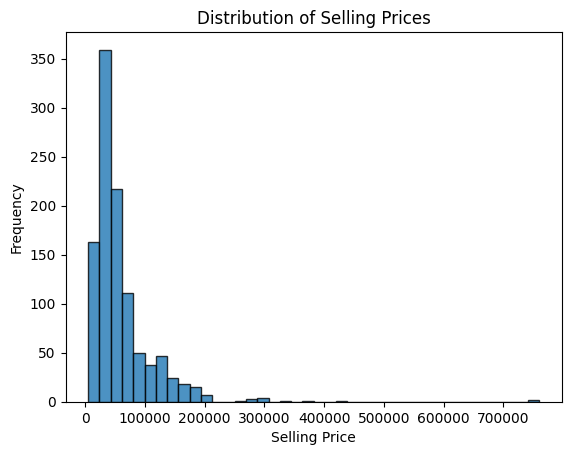

In [8]:
# Answer:
# Replace 'selling_price' with the exact column name if different.
col = 'selling_price'
if col not in df.columns:
    raise KeyError(f"'{col}' column not found. Please adjust to your dataset's column name.")

plt.figure()
df[col].dropna().plot(kind='hist', bins=40, edgecolor='black', alpha=0.8)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

### 📊 Observation — Distribution of Selling Prices

- The selling prices are **right-skewed**, with most bikes priced at the lower end.  
- Majority of bikes fall below **₹1,00,000**, indicating a concentration of budget or mid-range models.  
- Very few bikes have high selling prices, suggesting the presence of **a few premium or rare models**.  
- Overall, prices decrease sharply as they increase, showing a **long tail** toward the higher price range.


## Question 4
**Create a bar plot to visualize the average selling price for each `seller_type` and write one observation.**

seller_type
Individual    59711.923223
Dealer        46666.666667
Name: selling_price, dtype: float64


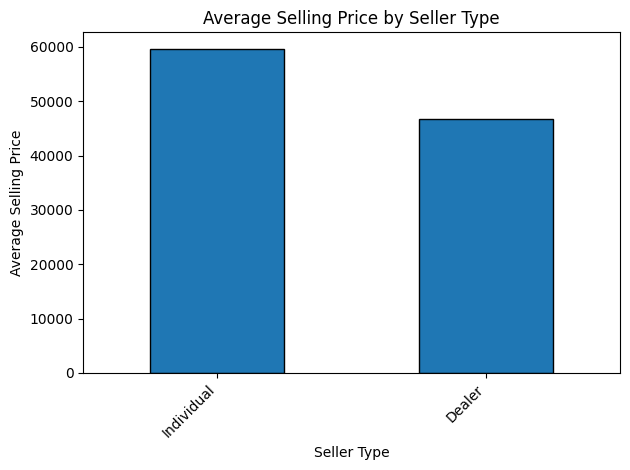

In [9]:
# Answer:
group_col = 'seller_type'
price_col = 'selling_price'
if group_col not in df.columns:
    raise KeyError(f"'{group_col}' not found.")
if price_col not in df.columns:
    raise KeyError(f"'{price_col}' not found.")

avg_price = df.groupby(group_col)[price_col].mean().sort_values(ascending=False)
print(avg_price)

plt.figure()
avg_price.plot(kind='bar', edgecolor='black')
plt.title('Average Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ✍️ Write your observation below as a Markdown cell if needed.


### 📝 Observation — Average Selling Price by Seller Type

- **Individual sellers** have a higher average selling price (₹59,700) compared to **dealers** (₹46,600).  
- This suggests that **dealers may sell bikes at lower prices** to attract buyers or clear inventory faster, while individuals may demand slightly higher prices.


## Question 5
**Compute the average `km_driven` for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.**

owner
4th owner    311500.000000
2nd owner     39288.991870
3rd owner     33292.181818
1st owner     32816.583333
Name: km_driven, dtype: float64


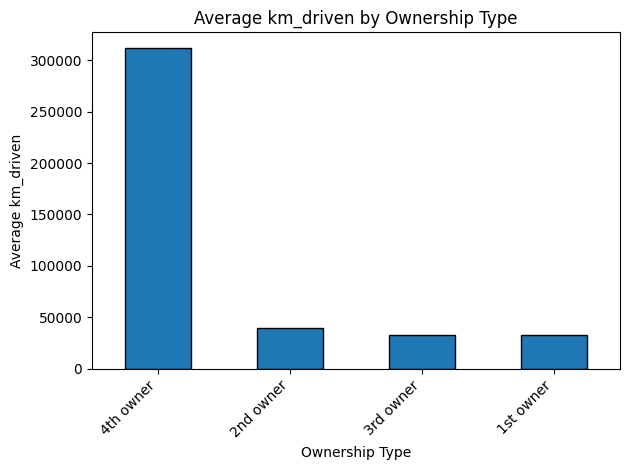

In [10]:
# Answer:
own_col = 'owner'
km_col = 'km_driven'
if own_col not in df.columns:
    raise KeyError(f"'{own_col}' not found.")
if km_col not in df.columns:
    raise KeyError(f"'{km_col}' not found.")

avg_km = df.groupby(own_col)[km_col].mean().sort_values(ascending=False)
print(avg_km)

plt.figure()
avg_km.plot(kind='bar', edgecolor='black')
plt.title('Average km_driven by Ownership Type')
plt.xlabel('Ownership Type')
plt.ylabel('Average km_driven')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Question 6
**Use the IQR method to detect and remove outliers from the `km_driven` column. Show before-and-after summary statistics.**

In [11]:
# Answer:
km_col = 'km_driven'
if km_col not in df.columns:
    raise KeyError(f"'{km_col}' not found.")

before_stats = df[km_col].describe()
print("Before outlier removal:\n", before_stats, "\n")

Q1 = df[km_col].quantile(0.25)
Q3 = df[km_col].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_no_out = df[(df[km_col] >= lower) & (df[km_col] <= upper)].copy()
after_stats = df_no_out[km_col].describe()
print("After outlier removal:\n", after_stats)

print(f"\nRemoved {len(df) - len(df_no_out)} rows as outliers (using 1.5*IQR rule).")

Before outlier removal:
 count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64 

After outlier removal:
 count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64

Removed 39 rows as outliers (using 1.5*IQR rule).


## Question 7
**Create a scatter plot of `year` vs. `selling_price` to explore the relationship between a bike's age and its price.**

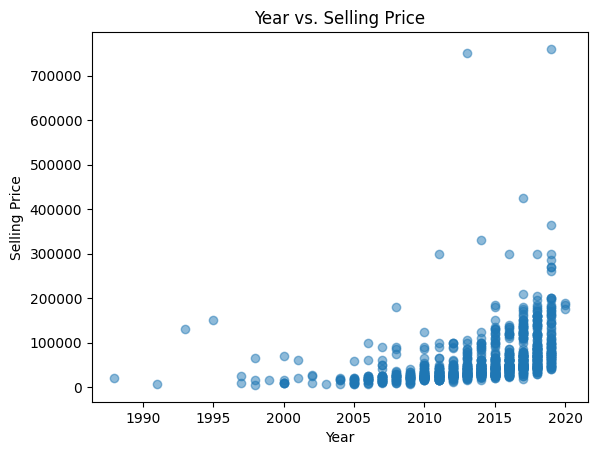

In [12]:
# Answer:
x_col = 'year'
y_col = 'selling_price'
if x_col not in df.columns or y_col not in df.columns:
    raise KeyError("Check that 'year' and 'selling_price' exist in the dataset.")

plt.figure()
plt.scatter(df[x_col], df[y_col], alpha=0.5)
plt.title('Year vs. Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

## Question 8
**Convert the `seller_type` column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.**

In [13]:
# Answer:
col = 'seller_type'
if col not in df.columns:
    raise KeyError(f"'{col}' not found.")
df_ohe = pd.get_dummies(df, columns=[col], drop_first=False, dtype=int)
display(df_ohe.head())

,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_type_Dealer,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,NaN,0,1
1,Honda Dio,45000,2017,1st owner,5650,NaN,0,1
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,0,1
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,0,1
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,NaN,0,1


## Question 9
**Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?**

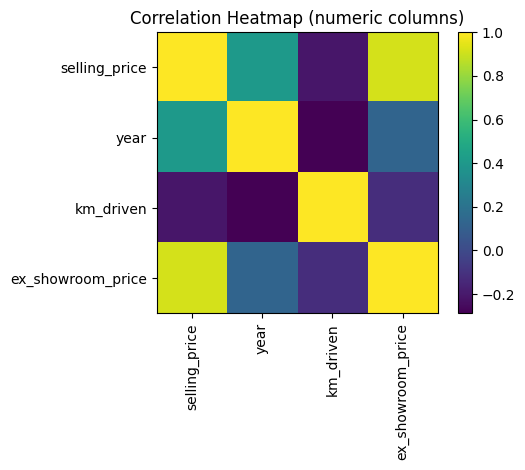

,selling_price,year,km_driven,ex_showroom_price
selling_price,1.000000,0.402188,-0.212937,0.918583
year,0.402188,1.000000,-0.288675,0.126378
km_driven,-0.212937,-0.288675,1.000000,-0.122011
ex_showroom_price,0.918583,0.126378,-0.122011,1.000000


In [14]:
# Answer:
num_df = df.select_dtypes(include=[np.number])
corr = num_df.corr(numeric_only=True)

plt.figure()
im = plt.imshow(corr, interpolation='nearest')
plt.title('Correlation Heatmap (numeric columns)')
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.tight_layout()
plt.show()

corr

### 🔍 Observation — Correlation Heatmap

- The **strongest positive correlation** is between **`selling_price`** and **`ex_showroom_price`** (~0.92), indicating that bikes with higher original prices tend to have higher resale values.  
- A **moderate positive correlation** exists between **`year`** and **`selling_price`** (~0.40), showing that newer bikes generally sell for more.  
- A **negative correlation** is seen between **`km_driven`** and both **`selling_price`** and **`year`**, suggesting that older or more-driven bikes have lower resale prices.


## Question 10
**Summarize your findings in a brief report:**

- What are the most important factors affecting a bike's selling price?
- Mention any data cleaning or feature engineering you performed.


**Key drivers of selling price observed:**
- **Year:** Newer bikes tend to have higher selling prices.  
- **km_driven:** Bikes with higher mileage generally sell for less.  
- **ex_showroom_price:** Shows a strong positive correlation with selling price — higher original price leads to higher resale value.  
- **seller_type:** Individual sellers usually list bikes at higher prices than dealers.

**Data cleaning and preprocessing performed:**
- Handled missing values in `ex_showroom_price` using **median imputation grouped by year**.  
- Removed outliers in `km_driven` using the **IQR method**.  
- Encoded categorical variables (e.g., `seller_type`) using **one-hot encoding**.  
- Verified relationships among numeric columns using a **correlation heatmap**.
